## Homework 3
### Part 1: Imbalanced Dataset

- In this homework, you will be working with an imbalanced Dataset. 
- The dataset is Credit Card Fraud Detection dataset which was hosted on Kaggle. 
- The aim is to detect fraudlent transactions.

### Instructions

1) Please push the .ipynb and .pdf to Github Classroom prior to the deadline, .py file is optional (not needed).<br>
2) Please include your Name and UNI below.

### Name: Jessica (Youjia) Li
### UNI: yl5542

### Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve


In [2]:
# Feel free to import any other packages you need

### **Data Preprocessing and Exploration**.
- Download the Kaggle Credit Card Fraud data set.<br>
- Features V1, V2, … V27, V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.<br>
- Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. <br>
- The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.<br>
- Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [3]:
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### **Examining the class Imbalance**
**1.1 How many observations are in this dataset? How many are positive and negative?** <br>
(Note: Positive labels are labeled as 1)

In [4]:
# Your Code Here
raw_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

#### **1.2 Cleaning and normalizing the data**
The raw data has a few issues. <br>
Since we are unsure what the time column actually means so drop the Time column. 
The Amount column also has a wide range of values covered so we take the log of the Amount column to reduce its range. <br>

The below is already done for you.

In [5]:
cleaned_df = raw_df.copy()

# You don't want the 'Time' column. Pop it off
cleaned_df.pop('Time')

# The 'Amount' column covers a huge range. Convert it to log-space.
eps = 0.001
cleaned_df['Log Amount'] = np.log(cleaned_df.pop('Amount') + eps)

**1.2.1 Split the dataset into development and test sets. Set test size as 20% and random state as 42. Print the shape of your development and test features**

In [6]:
# Your Code Here
cleaned_df.dropna(inplace=True)
df_X = cleaned_df.drop(columns='Class')
df_Y = cleaned_df['Class']
X_dev, X_test, y_dev, y_test = train_test_split(df_X, df_Y, test_size=0.2, random_state=42)
print('Development set shape: ',X_dev.shape)
print('Test set shape: ',X_test.shape)

Development set shape:  (227845, 29)
Test set shape:  (56962, 29)


**1.2.2 Normalize the features using Standard Scaler from Sklearn.**

In [7]:
# Your Code Here
ss = StandardScaler()
X_dev = ss.fit_transform(X_dev)
X_test = ss.transform(X_test)

### **Default Baseline**
**1.3.1 First, let us fit a default Decision tree classifier (use max_depth=10 and random_state=42). Print the AUC and Average Precision values of 5 Fold Cross Validation**

In [8]:
# Your Code Here
Baseline_tree = DecisionTreeClassifier(max_depth=10, random_state=42)
Baseline_tree.fit(X_dev,y_dev)
scores =cross_validate(Baseline_tree, X_dev, y_dev, cv=5,scoring=('roc_auc','average_precision'))
print('roc_auc score',scores['test_roc_auc'])
print('average precision score',scores['test_average_precision'])


roc_auc score [0.86957634 0.82799822 0.83798122 0.88266235 0.90893353]
average precision score [0.64646286 0.6763446  0.61677062 0.68317716 0.68281098]


### **Random Oversampling**
**1.3.2 Perform random oversampling on the development dataset.**

*   How many positive and negative labels do you observe after random oversampling?
*   What is the shape of your development dataset?

(Note: Set random state as 42 when performing oversampling)

In [9]:
# Your Code Here
ros = RandomOverSampler(random_state=42)
X_dev_Oversample, y_dev_Oversample = ros.fit_resample(X_dev,y_dev)
print(X_dev.shape)
print(X_dev_Oversample.shape)
y_dev_Oversample.value_counts()

(227845, 29)
(454902, 29)


0    227451
1    227451
Name: Class, dtype: int64

**1.3.3 Repeat 1.3.1 using the dataset you created in the above step (1.3.2 Random oversampling). <br>(Make sure you use the same hyperparameters as 1.3.1. i.e., max_depth=10, random_state=42 and 5 Fold Cross Validation) <br>
This will help us to compare the models.**

In [10]:
# Your Code Here
Oversample_tree = DecisionTreeClassifier(max_depth=10, random_state=42)
Oversample_tree.fit(X_dev_Oversample,y_dev_Oversample)
scores =cross_validate(Oversample_tree, X_dev_Oversample, y_dev_Oversample, cv=5,scoring=('roc_auc','average_precision'))
print('roc_auc score',scores['test_roc_auc'])
print('average precision score',scores['test_average_precision'])

roc_auc score [0.99840012 0.9983086  0.99847279 0.99847804 0.99857557]
average precision score [0.99786268 0.99767719 0.9978636  0.99787444 0.99807898]


### **Random Undersampling**
**1.3.4 Perform Random undersampling on the development dataset.**

- How many positive and negative labels do you observe after random undersampling?
- What is the shape of your development dataset?

(Note: Set random state as 42 when performing undersampling)

In [11]:
# Your Code Here
rus = RandomUnderSampler(replacement=False,random_state=42)
X_dev_subsample,y_dev_subsample = rus.fit_resample(X_dev,y_dev)
print(X_dev_subsample.shape)
y_dev_subsample.value_counts()

(788, 29)


0    394
1    394
Name: Class, dtype: int64

**1.3.5 Repeat 1.3.1 using the dataset you created in the above step(1.3.4 Random undersampling).<br>(Make sure you use the same hyperparameters as 1.3.1. i.e., max_depth=10, random_state=42 and 5 Fold Cross Validation)<br>
This will help us to compare the models**

In [12]:
# Your Code Here
Subsample_tree = DecisionTreeClassifier(max_depth=10, random_state=42)
Subsample_tree.fit(X_dev_subsample,y_dev_subsample)
scores =cross_validate(Subsample_tree, X_dev_subsample, y_dev_subsample, cv=5,scoring=('roc_auc','average_precision'))
print('roc_auc score',scores['test_roc_auc'])
print('average precision score',scores['test_average_precision'])

roc_auc score [0.8852748  0.86388399 0.89873418 0.91731581 0.94790652]
average precision score [0.82838644 0.81661392 0.86683544 0.87531025 0.92073059]


### **SMOTE**
**1.3.6 Perform Synthetic Minority Oversampling Technique (SMOTE) on the development dataset**

- How many positive and negative labels do you observe after performing SMOTE?
- What is the shape of your development dataset?

(Note: Set random state as 42 when performing SMOTE)

In [13]:
# Your Code Here
smote = SMOTE(random_state=42)
X_dev_smote,y_dev_smote = smote.fit_resample(X_dev,y_dev)
print(X_dev_smote.shape)
y_dev_smote.value_counts()

(454902, 29)


0    227451
1    227451
Name: Class, dtype: int64

**1.3.7 Repeat 1.3.1 using the dataset you created in the above step(1.3.4 SMOTE).<br>(Make sure you use the same hyperparameters as 1.3.1. i.e., max_depth=10, random_state=42 and 5 Fold Cross Validation)<br>
This will help us to compare the models**

In [14]:
# Your Code Here
Smote_tree = DecisionTreeClassifier(max_depth=10, random_state=42)
Smote_tree.fit(X_dev_smote,y_dev_smote)
scores =cross_validate(Smote_tree, X_dev_smote, y_dev_smote, cv=5,scoring=('roc_auc','average_precision'))
print('roc_auc score',scores['test_roc_auc'])
print('average precision score',scores['test_average_precision'])

roc_auc score [0.99729603 0.99747394 0.99713467 0.99703584 0.99724342]
average precision score [0.99658165 0.99656764 0.99603047 0.99593317 0.99618909]


### **Balanced Weight**

**1.3.8 Train a balanced default Decision tree classifier. <br> [ use max_depth=10 and random_state=42 and balance the class weights with 5 Fold Cross Validation ] <br>
Print the AUC and average precision on dev set**

In [15]:
# Your Code Here
BalancedWeights_tree = DecisionTreeClassifier(max_depth=10, random_state=42, class_weight='balanced')
BalancedWeights_tree.fit(X_dev,y_dev)
scores = cross_validate(BalancedWeights_tree, X_dev,y_dev,cv=5,scoring=('roc_auc','average_precision'))
print('roc_auc score',scores['test_roc_auc'])
print('average precision score',scores['test_average_precision'])

roc_auc score [0.9053394  0.90420916 0.88501785 0.91692054 0.92351567]
average precision score [0.63963546 0.61345204 0.61983563 0.63412551 0.61125666]


### **Model Prediction & Evaluation**
**1.4.1 Make predictions on the test set using the five models that you built and report their AUC values.**<br>
(Five models include models from - Default Baseline, Random Undersampling, Random Oversampling, SMOTE & Balanced Weight)

In [16]:
# Your Code Here

print('Baseline Model AUC scores: ', roc_auc_score(y_test,Baseline_tree.predict_proba(X_test)[:,1]) )
print('Random Oversampling Model AUC scores: ', roc_auc_score(y_test,Oversample_tree.predict_proba(X_test)[:,1]) )
print('Random Undersampling Model AUC scores: ', roc_auc_score(y_test,Subsample_tree.predict_proba(X_test)[:,1]) )
print('SMOTE Model AUC scores: ', roc_auc_score(y_test,Smote_tree.predict_proba(X_test)[:,1]) ) 
print('Balanced Weight Model AUC scores: ', roc_auc_score(y_test,BalancedWeights_tree.predict_proba(X_test)[:,1]) )

Baseline Model AUC scores:  0.871912253224306
Random Oversampling Model AUC scores:  0.8609190528349776
Random Undersampling Model AUC scores:  0.9050787485787788
SMOTE Model AUC scores:  0.8893473364303515
Balanced Weight Model AUC scores:  0.8432507780827582


**1.4.2 Plot Confusion Matrices for all the five models on the test set. Comment your results and share your observations of the confusion matrices in detail (Explanation carries lot of points)**<br>
(Five models include models from - Default Baseline, Random Undersampling, Random Oversampling, SMOTE & Balanced Weight)

In [17]:
# Your Code Here
print('Confusion Matrix for Baseline Model: ')
confusion_matrix(Baseline_tree.predict(X_test),y_test)  

Confusion Matrix for Baseline Model: 


array([[56852,    24],
       [   12,    74]])

In [18]:
print('Confusion Matrix for Random Oversampling Model: ')
confusion_matrix(Oversample_tree.predict(X_test),y_test) 

Confusion Matrix for Random Oversampling Model: 


array([[56592,    19],
       [  272,    79]])

In [19]:
print('Confusion Matrix for Random Undersampling Model')
confusion_matrix(Subsample_tree.predict(X_test),y_test) 

Confusion Matrix for Random Undersampling Model


array([[51291,     9],
       [ 5573,    89]])

In [20]:
print('Confusion Matrix for SMOTE Model')
confusion_matrix(Smote_tree.predict(X_test),y_test)

Confusion Matrix for SMOTE Model


array([[56058,    15],
       [  806,    83]])

In [21]:
print('Confusion Matrix for Balanced Weight Model')
confusion_matrix(BalancedWeights_tree.predict(X_test),y_test) 

Confusion Matrix for Balanced Weight Model


array([[56587,    21],
       [  277,    77]])

Comments: For the four models after baseline model, we can see that they all have a different level of increase in the true negatives, a corresponding increase in the false negatives, and a reduction in the false positives. This is because these models perform a better job in correctly identifying the minority class, as we applied techniques address the imbalanced datasets, so that an improvement in identifying negative class is visible. 

**1.4.3 Plot ROC for all the five models on the test set in a single plot. Make sure you label axes and legend properly. Comment on your results and share your observations in detail (Explanation carries lot of points)**<br>
(Five models include models from - Default Baseline, Random Undersampling, Random Oversampling, SMOTE & Balanced Weight)

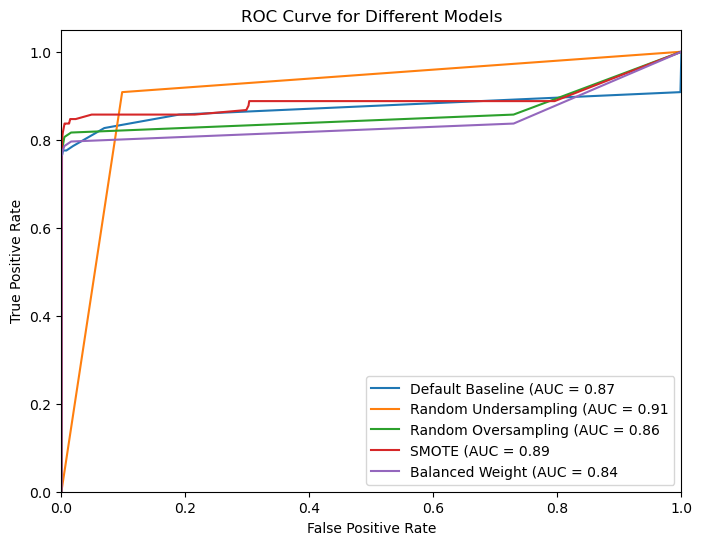

In [22]:
# Your Code Here
models = {
    "Default Baseline": Baseline_tree,
    "Random Undersampling": Subsample_tree,
    "Random Oversampling": Oversample_tree,
    "SMOTE": Smote_tree,
    "Balanced Weight":BalancedWeights_tree,
}

roc_data = {}

# Iterate through the models
for model_name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    roc_data[model_name] = (fpr, tpr, auc_score)

plt.figure(figsize=(8, 6))

for model_name, (fpr, tpr, auc_score) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f}')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')
plt.legend(loc="lower right")


plt.show()